In [1]:
import pandas as pd
from pathlib import Path
import os 
import random
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import optuna

from product_classification.training import evaluate_gbm, train_gbm, find_best_hyper_param_gbm


In [2]:
seed=2022
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

In [4]:
cwd = Path().resolve()
base_path = cwd.parent

## Read data

In [5]:
train_val = pd.read_csv(base_path / "data" / "data_train.csv")
test = pd.read_csv(base_path / "data" / "data_test.csv")

## Preprocess data

In [6]:
label_encoder = LabelEncoder()

In [7]:
train_val["target"] = label_encoder.fit_transform(train_val["category_id"])

In [8]:
test["target"] = label_encoder.transform(test["category_id"])

In [9]:
train, val = train_test_split(train_val, test_size=0.2, random_state=seed)

## Train and Select Model

In [10]:
col_names = [f"f{i}" for i in range(128)]
target_name="target"

#### We have multiple choices in the learning algorithm we can use. An MLP, KNN, or Gradient boosting for example.
#### In what follows, we will try Gradient boosting.

### Baseline

In [11]:
parameters = {
        "boosting_type": "gbdt",
        "objective": "multiclass",
        "metric": "multi_logloss",
        "learning_rate": 0.01,
        "n_estimators": 1000,
        "max_depth": 10,
        "num_leaves": 30,
        "subsample": 0.5,
        "colsample_bytree": 0.5
    }

In [12]:
baseline_classifier = train_gbm(train=train, val=val, feature_names=col_names, target_name=target_name, params=parameters, log=False)

Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's multi_logloss: 0.979918
Evaluated only: multi_logloss


In [13]:
baseline_val_metrics = evaluate_gbm(val=val, feature_names=col_names, target_name=target_name, classifier=baseline_classifier)

In [14]:
for k in ["f1_macro", "f1_weighted", "accuracy"]:
    print("val", k, baseline_val_metrics[k])

val f1_macro 0.6219545030421645
val f1_weighted 0.6368819450422253
val accuracy 0.6439737457813115


### Optuna

Here we will do a search for the best hyper-parameters using optuna.

In [15]:
study = find_best_hyper_param_gbm(
        train=train,
        val=val,
        feature_names=col_names,
        target_name="target",
        n_trials=20
    )

[I 2022-07-11 09:05:10,627] A new study created in memory with name: no-name-51119764-fc18-4db6-ad3b-4b0f24445865


Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's multi_logloss: 1.03237
Evaluated only: multi_logloss


[I 2022-07-11 09:22:59,736] Trial 0 finished with value: 0.6319079827853933 and parameters: {'reg_alpha': 1.5008965206960216e-05, 'reg_lambda': 0.0023483176148659988, 'num_leaves': 74, 'max_depth': 12, 'colsample_bytree': 0.20763793690460947, 'subsample': 0.20519521377350156, 'subsample_freq': 3, 'min_child_samples': 82, 'learning_rate': 0.0029637903574111484}. Best is trial 0 with value: 0.6319079827853933.


Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's multi_logloss: 0.963202
Evaluated only: multi_logloss


[I 2022-07-11 09:35:18,203] Trial 1 finished with value: 0.6344189258495069 and parameters: {'reg_alpha': 1.1626724978854518e-06, 'reg_lambda': 0.0014436747972388796, 'num_leaves': 21, 'max_depth': 5, 'colsample_bytree': 0.45739120562091273, 'subsample': 0.1928405824997978, 'subsample_freq': 2, 'min_child_samples': 43, 'learning_rate': 0.0046624359459470155}. Best is trial 1 with value: 0.6344189258495069.


Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[1999]	valid_0's multi_logloss: 0.940521
Evaluated only: multi_logloss


[I 2022-07-11 09:52:22,714] Trial 2 finished with value: 0.6342745061496978 and parameters: {'reg_alpha': 5.8258870501319265e-05, 'reg_lambda': 0.014342119831252583, 'num_leaves': 228, 'max_depth': 5, 'colsample_bytree': 0.4990850193514885, 'subsample': 0.39515255722939024, 'subsample_freq': 7, 'min_child_samples': 79, 'learning_rate': 0.006340191802689123}. Best is trial 1 with value: 0.6344189258495069.


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[1505]	valid_0's multi_logloss: 0.975575
Evaluated only: multi_logloss


[I 2022-07-11 10:04:17,674] Trial 3 finished with value: 0.6307176087050211 and parameters: {'reg_alpha': 0.03072097056495245, 'reg_lambda': 2.411845938289032e-08, 'num_leaves': 227, 'max_depth': 7, 'colsample_bytree': 0.2908611353350921, 'subsample': 0.19120425614228387, 'subsample_freq': 7, 'min_child_samples': 50, 'learning_rate': 0.006645038634076707}. Best is trial 1 with value: 0.6344189258495069.


Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's multi_logloss: 0.955693
Evaluated only: multi_logloss


[I 2022-07-11 10:19:48,133] Trial 4 finished with value: 0.6327015989906856 and parameters: {'reg_alpha': 0.0012962999728479351, 'reg_lambda': 1.4360012281577356e-08, 'num_leaves': 80, 'max_depth': 6, 'colsample_bytree': 0.4305792759515386, 'subsample': 0.27709639177310286, 'subsample_freq': 7, 'min_child_samples': 59, 'learning_rate': 0.0047342676066597774}. Best is trial 1 with value: 0.6344189258495069.


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[883]	valid_0's multi_logloss: 1.08686
Evaluated only: multi_logloss


[I 2022-07-11 10:44:17,198] Trial 5 finished with value: 0.6236060255989683 and parameters: {'reg_alpha': 4.6757671690577183e-07, 'reg_lambda': 0.019678991816188915, 'num_leaves': 225, 'max_depth': 11, 'colsample_bytree': 0.4752124867595373, 'subsample': 0.38548968130800154, 'subsample_freq': 6, 'min_child_samples': 6, 'learning_rate': 0.0064813026485101444}. Best is trial 1 with value: 0.6344189258495069.


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[933]	valid_0's multi_logloss: 1.01366
Evaluated only: multi_logloss


[I 2022-07-11 10:56:49,532] Trial 6 finished with value: 0.6276824693566705 and parameters: {'reg_alpha': 0.0004912491759775432, 'reg_lambda': 0.005729580545828359, 'num_leaves': 186, 'max_depth': 11, 'colsample_bytree': 0.2717567549677136, 'subsample': 0.19952103513611213, 'subsample_freq': 2, 'min_child_samples': 73, 'learning_rate': 0.008254226567880125}. Best is trial 1 with value: 0.6344189258495069.


Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[1993]	valid_0's multi_logloss: 0.9446
Evaluated only: multi_logloss


[I 2022-07-11 11:09:14,749] Trial 7 finished with value: 0.6347245743793916 and parameters: {'reg_alpha': 0.03892430373026206, 'reg_lambda': 8.183874923157443e-07, 'num_leaves': 240, 'max_depth': 5, 'colsample_bytree': 0.28465740397974215, 'subsample': 0.24779940199470699, 'subsample_freq': 7, 'min_child_samples': 52, 'learning_rate': 0.00685863952134005}. Best is trial 7 with value: 0.6347245743793916.


Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's multi_logloss: 1.06285
Evaluated only: multi_logloss


[I 2022-07-11 11:22:11,778] Trial 8 finished with value: 0.6239967896054588 and parameters: {'reg_alpha': 0.0003450091555296947, 'reg_lambda': 2.9038462368379295e-06, 'num_leaves': 95, 'max_depth': 4, 'colsample_bytree': 0.4036966610839834, 'subsample': 0.39386082354906204, 'subsample_freq': 4, 'min_child_samples': 46, 'learning_rate': 0.002628802118687083}. Best is trial 7 with value: 0.6347245743793916.


Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's multi_logloss: 0.984995
Evaluated only: multi_logloss


[I 2022-07-11 11:40:51,748] Trial 9 finished with value: 0.633182944702669 and parameters: {'reg_alpha': 2.590890958586837e-07, 'reg_lambda': 0.039103355408642834, 'num_leaves': 70, 'max_depth': 7, 'colsample_bytree': 0.4861036921380627, 'subsample': 0.20849623841294226, 'subsample_freq': 6, 'min_child_samples': 40, 'learning_rate': 0.003135419464566112}. Best is trial 7 with value: 0.6347245743793916.


Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's multi_logloss: 1.25865
Evaluated only: multi_logloss


[I 2022-07-11 11:57:10,047] Trial 10 finished with value: 0.6285392942301933 and parameters: {'reg_alpha': 0.07435843423721046, 'reg_lambda': 1.962930476047929e-06, 'num_leaves': 158, 'max_depth': 9, 'colsample_bytree': 0.3519297762919443, 'subsample': 0.10844137330718545, 'subsample_freq': 5, 'min_child_samples': 100, 'learning_rate': 0.0011941502497955035}. Best is trial 7 with value: 0.6347245743793916.


Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's multi_logloss: 0.97741
Evaluated only: multi_logloss


[I 2022-07-11 12:06:56,299] Trial 11 finished with value: 0.6354595777481152 and parameters: {'reg_alpha': 2.445720854712531e-06, 'reg_lambda': 0.00013222706547387405, 'num_leaves': 16, 'max_depth': 4, 'colsample_bytree': 0.3096645147471717, 'subsample': 0.27809753335369947, 'subsample_freq': 1, 'min_child_samples': 23, 'learning_rate': 0.004502947426135766}. Best is trial 11 with value: 0.6354595777481152.


Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's multi_logloss: 1.16616
Evaluated only: multi_logloss


[I 2022-07-11 12:17:10,944] Trial 12 finished with value: 0.6211115278557249 and parameters: {'reg_alpha': 2.83604818306489e-08, 'reg_lambda': 6.84550003727505e-05, 'num_leaves': 17, 'max_depth': 4, 'colsample_bytree': 0.3055496714378469, 'subsample': 0.2963720843457045, 'subsample_freq': 4, 'min_child_samples': 19, 'learning_rate': 0.0019195955967687129}. Best is trial 11 with value: 0.6354595777481152.


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[858]	valid_0's multi_logloss: 1.011
Evaluated only: multi_logloss


[I 2022-07-11 12:26:45,790] Trial 13 finished with value: 0.6267511992549507 and parameters: {'reg_alpha': 5.832206262987245e-06, 'reg_lambda': 4.6160043421625845e-05, 'num_leaves': 130, 'max_depth': 8, 'colsample_bytree': 0.23541123844159795, 'subsample': 0.325044487406771, 'subsample_freq': 1, 'min_child_samples': 26, 'learning_rate': 0.009588387810042377}. Best is trial 11 with value: 0.6354595777481152.


Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's multi_logloss: 0.980564
Evaluated only: multi_logloss


[I 2022-07-11 12:36:06,190] Trial 14 finished with value: 0.6342907833854202 and parameters: {'reg_alpha': 0.0016595210487340183, 'reg_lambda': 8.387902269763939e-07, 'num_leaves': 254, 'max_depth': 4, 'colsample_bytree': 0.35167917420088546, 'subsample': 0.25227339388984515, 'subsample_freq': 1, 'min_child_samples': 28, 'learning_rate': 0.004330333022056556}. Best is trial 11 with value: 0.6354595777481152.


Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's multi_logloss: 0.967282
Evaluated only: multi_logloss


[I 2022-07-11 12:52:49,855] Trial 15 finished with value: 0.6306221036347027 and parameters: {'reg_alpha': 0.007463503438484613, 'reg_lambda': 0.00037053932011149544, 'num_leaves': 178, 'max_depth': 6, 'colsample_bytree': 0.3173268844397965, 'subsample': 0.3184813555500866, 'subsample_freq': 3, 'min_child_samples': 6, 'learning_rate': 0.004194091216611514}. Best is trial 11 with value: 0.6354595777481152.


Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's multi_logloss: 1.10907
Evaluated only: multi_logloss


[I 2022-07-11 13:02:21,364] Trial 16 finished with value: 0.6316261313651564 and parameters: {'reg_alpha': 2.797496180316564e-08, 'reg_lambda': 2.0108008134450116e-07, 'num_leaves': 119, 'max_depth': 5, 'colsample_bytree': 0.2508791264853571, 'subsample': 0.155665628012717, 'subsample_freq': 5, 'min_child_samples': 64, 'learning_rate': 0.0021192993122425303}. Best is trial 11 with value: 0.6354595777481152.


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[1451]	valid_0's multi_logloss: 1.00456
Evaluated only: multi_logloss


[I 2022-07-11 13:16:36,281] Trial 17 finished with value: 0.6255318429554247 and parameters: {'reg_alpha': 4.317905950951854e-05, 'reg_lambda': 8.236099371317156e-06, 'num_leaves': 55, 'max_depth': 9, 'colsample_bytree': 0.3824675779392013, 'subsample': 0.24988140019899716, 'subsample_freq': 3, 'min_child_samples': 32, 'learning_rate': 0.005605499877956783}. Best is trial 11 with value: 0.6354595777481152.


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[1187]	valid_0's multi_logloss: 0.963949
Evaluated only: multi_logloss


[I 2022-07-11 13:26:43,670] Trial 18 finished with value: 0.6311634533205941 and parameters: {'reg_alpha': 3.4327446769762784e-06, 'reg_lambda': 1.9983411865880321e-07, 'num_leaves': 194, 'max_depth': 6, 'colsample_bytree': 0.32856436506436326, 'subsample': 0.34811855272725184, 'subsample_freq': 5, 'min_child_samples': 19, 'learning_rate': 0.00826284137333196}. Best is trial 11 with value: 0.6354595777481152.


Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's multi_logloss: 1.01002
Evaluated only: multi_logloss


[I 2022-07-11 13:35:06,142] Trial 19 finished with value: 0.6333882108033906 and parameters: {'reg_alpha': 0.00012918380860106485, 'reg_lambda': 0.00017949910448754566, 'num_leaves': 109, 'max_depth': 4, 'colsample_bytree': 0.27438490032505136, 'subsample': 0.2526725177651089, 'subsample_freq': 2, 'min_child_samples': 59, 'learning_rate': 0.003659805743808139}. Best is trial 11 with value: 0.6354595777481152.


In [16]:
print("Best f1_macro", study.best_value)

Best f1_macro 0.6354595777481152


In [17]:
study.best_params

{'reg_alpha': 2.445720854712531e-06,
 'reg_lambda': 0.00013222706547387405,
 'num_leaves': 16,
 'max_depth': 4,
 'colsample_bytree': 0.3096645147471717,
 'subsample': 0.27809753335369947,
 'subsample_freq': 1,
 'min_child_samples': 23,
 'learning_rate': 0.004502947426135766}

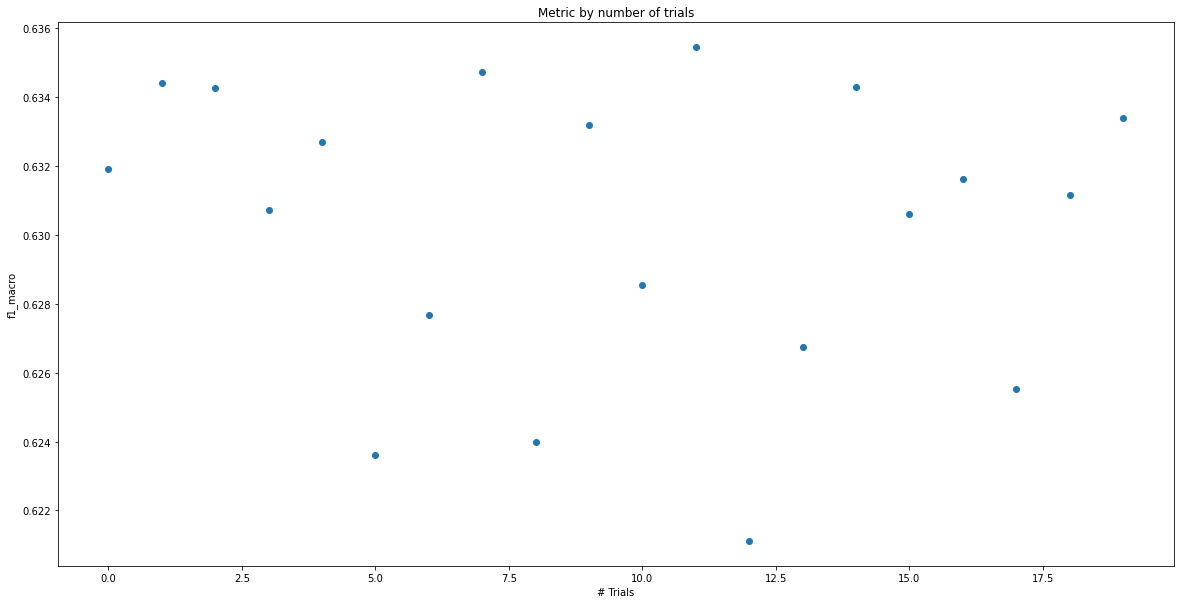

In [18]:
fig = plt.figure(figsize=(20, 10))
plt.scatter(range(len(study.trials)), [x.value for x in study.trials])
plt.xlabel("# Trials")
plt.ylabel("f1_macro")
plt.title("Metric by number of trials")
plt.show()

In [38]:
best_parameters = {
        "boosting_type": "gbdt",
        "objective": "multiclass",
        "metric": "multi_logloss",
        "n_estimators": 3000,
        **study.best_params
    }


In [39]:
best_classifier = train_gbm(train=train, val=val, feature_names=col_names, target_name=target_name, params=best_parameters, log=False)

Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[3000]	valid_0's multi_logloss: 0.940494
Evaluated only: multi_logloss


In [40]:
best_val_metrics = evaluate_gbm(val=val, feature_names=col_names, target_name=target_name, classifier=best_classifier)

In [41]:
for k in ["f1_macro", "f1_weighted", "accuracy"]:
    print("val", k, best_val_metrics[k])

val f1_macro 0.6367092955616233
val f1_weighted 0.6495943828879033
val accuracy 0.6572250864442926


In [42]:
per_class_val_metrics = pd.DataFrame({
    "target": range(len(best_val_metrics["per_class_f1"])), 
    "f1": best_val_metrics["per_class_f1"],
    "category_id": label_encoder.inverse_transform(range(len(best_val_metrics["per_class_f1"])))
})

per_class_val_metrics.sort_values(by="f1", inplace=True)

print(per_class_val_metrics)

    target        f1  category_id
71      71  0.304813        10149
35      35  0.305136         3080
12      12  0.309305         2820
29      29  0.383721         3043
13      13  0.389549         2824
..     ...       ...          ...
55      55  0.938776         7024
32      32  0.963650         3056
53      53  0.964068         6933
67      67  0.982164         9560
66      66  0.990826         8931

[101 rows x 3 columns]


## Evaluate Model

In [43]:
best_test_metrics = evaluate_gbm(test, feature_names=col_names, target_name=target_name, classifier=best_classifier)

In [44]:
for k in ["f1_macro", "f1_weighted", "accuracy"]:
    print("test", k, best_test_metrics[k])

test f1_macro 0.6132670455164222
test f1_weighted 0.6259979823874611
test accuracy 0.6324153963073897


In [45]:
per_class_test_metrics = pd.DataFrame({
    "target": range(len(best_test_metrics["per_class_f1"])), 
    "f1": best_test_metrics["per_class_f1"],
    "category_id": label_encoder.inverse_transform(range(len(best_test_metrics["per_class_f1"])))
})

per_class_test_metrics.sort_values(by="f1", inplace=True)

print(per_class_test_metrics)

    target        f1  category_id
86      86  0.273585        14763
12      12  0.318695         2820
35      35  0.333333         3080
33      33  0.350820         3069
13      13  0.362353         2824
..     ...       ...          ...
53      53  0.888889         6933
55      55  0.895470         7024
32      32  0.966781         3056
67      67  0.972638         9560
66      66  0.990374         8931

[101 rows x 3 columns]


#### Some classes have a pretty good f1 score, like 14763 or 2820, other have a lower f1 score like 8931.

## Possible improvements

### Using extra data and better feature representations

#### To solve this problem, we can either collect more labeled data for those classes or work on improving the process by which the features f0 to f127 are generated.
#### If we assume that the features are component of vector embeddings, we can maybe leverage pre-trained language models if the original data is text or use an unsupervised training scheme like SimCLR on large amounts of in-domain data if it is images.
#### We can also try transfer learning if we can scrap these types of samples from the web. We can train an initial model on these scraped data and then finetune the weights on the current dataset.
#### One other promissing approach is to try a multi-modal solution, where we use image, text title and description and other metadata to classify the category of each product.

### Using hierarchy information

#### One other approach that may help in improving the performance is to use the hierarchy information when building the classification system.
#### We can build a model (or a classification head) for each level of the hierarchy. This can allow us to reduce the distance between the target leaf and predicted leaf.